In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import *
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline

# LOADING THE DATA AND DATA EXPLORATION 

In [ ]:
df = pd.read_csv("/kaggle/input/climate/hack-for-climate-hackathon-bhuabaneswar-ict89534/Training Dataset.csv")
df.head()

,Condition No. 1,Condition No. 2,Condition No. 3,Condition No. 4,Condition No. 5,Condition No. 6,Condition No. 7,Condition No. 8,Condition No. 9,Condition No. 10,...,Condition No. 25,Condition No. 26,Condition No. 27,Condition No. 28,Condition No. 29,Condition No. 37,Condition No. 35,Condition No. 41,Condition No. 42,Targetted Condition No. 1
0,3687.5,4510.6,9.3160,26.734,42.511,74.935,120.42,0.33407,80.345,24.203,...,4.9187,2.3120,0.018975,0.84982,0.107870,53.729,43.107,130.439769,1975.095664,3098.8
1,3685.5,4511.5,9.3103,26.661,42.478,75.888,120.41,0.32859,79.935,26.669,...,4.7347,2.2965,0.021290,0.85223,0.119180,54.179,45.041,130.296577,1975.105411,3113.9
2,3682.8,4570.5,9.2759,26.653,42.224,75.779,120.43,0.35016,80.379,23.216,...,4.8275,2.2578,0.015472,0.81907,0.098032,54.413,42.933,130.280885,1975.091763,3100.0
3,3573.8,4547.2,9.3265,26.517,42.246,74.906,120.38,0.33413,80.407,25.154,...,4.8399,2.3040,0.007096,0.84621,0.101700,53.603,44.186,130.014115,1975.099423,3102.7
4,3644.3,4530.7,9.3318,27.119,42.199,75.036,120.42,0.34601,80.233,24.941,...,4.8477,2.2572,0.023564,0.83298,0.097448,52.915,43.488,131.194962,1975.098581,3107.4


In [ ]:
categoricalCols = [col for col in df.columns if df[col].dtype == 'object']
numericalCols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
def plotHistogram(N, row, col, numericalCols):
    plt.figure(figsize = (20, 15))
    plotNumber = 1
    for column in numericalCols:
        if plotNumber <= N:
            ax = plt.subplot(row, col, plotNumber)
            sns.histplot(df[column], color = 'green')
            plt.xlabel(column)
        plotNumber += 1
    plt.tight_layout()
    plt.show()

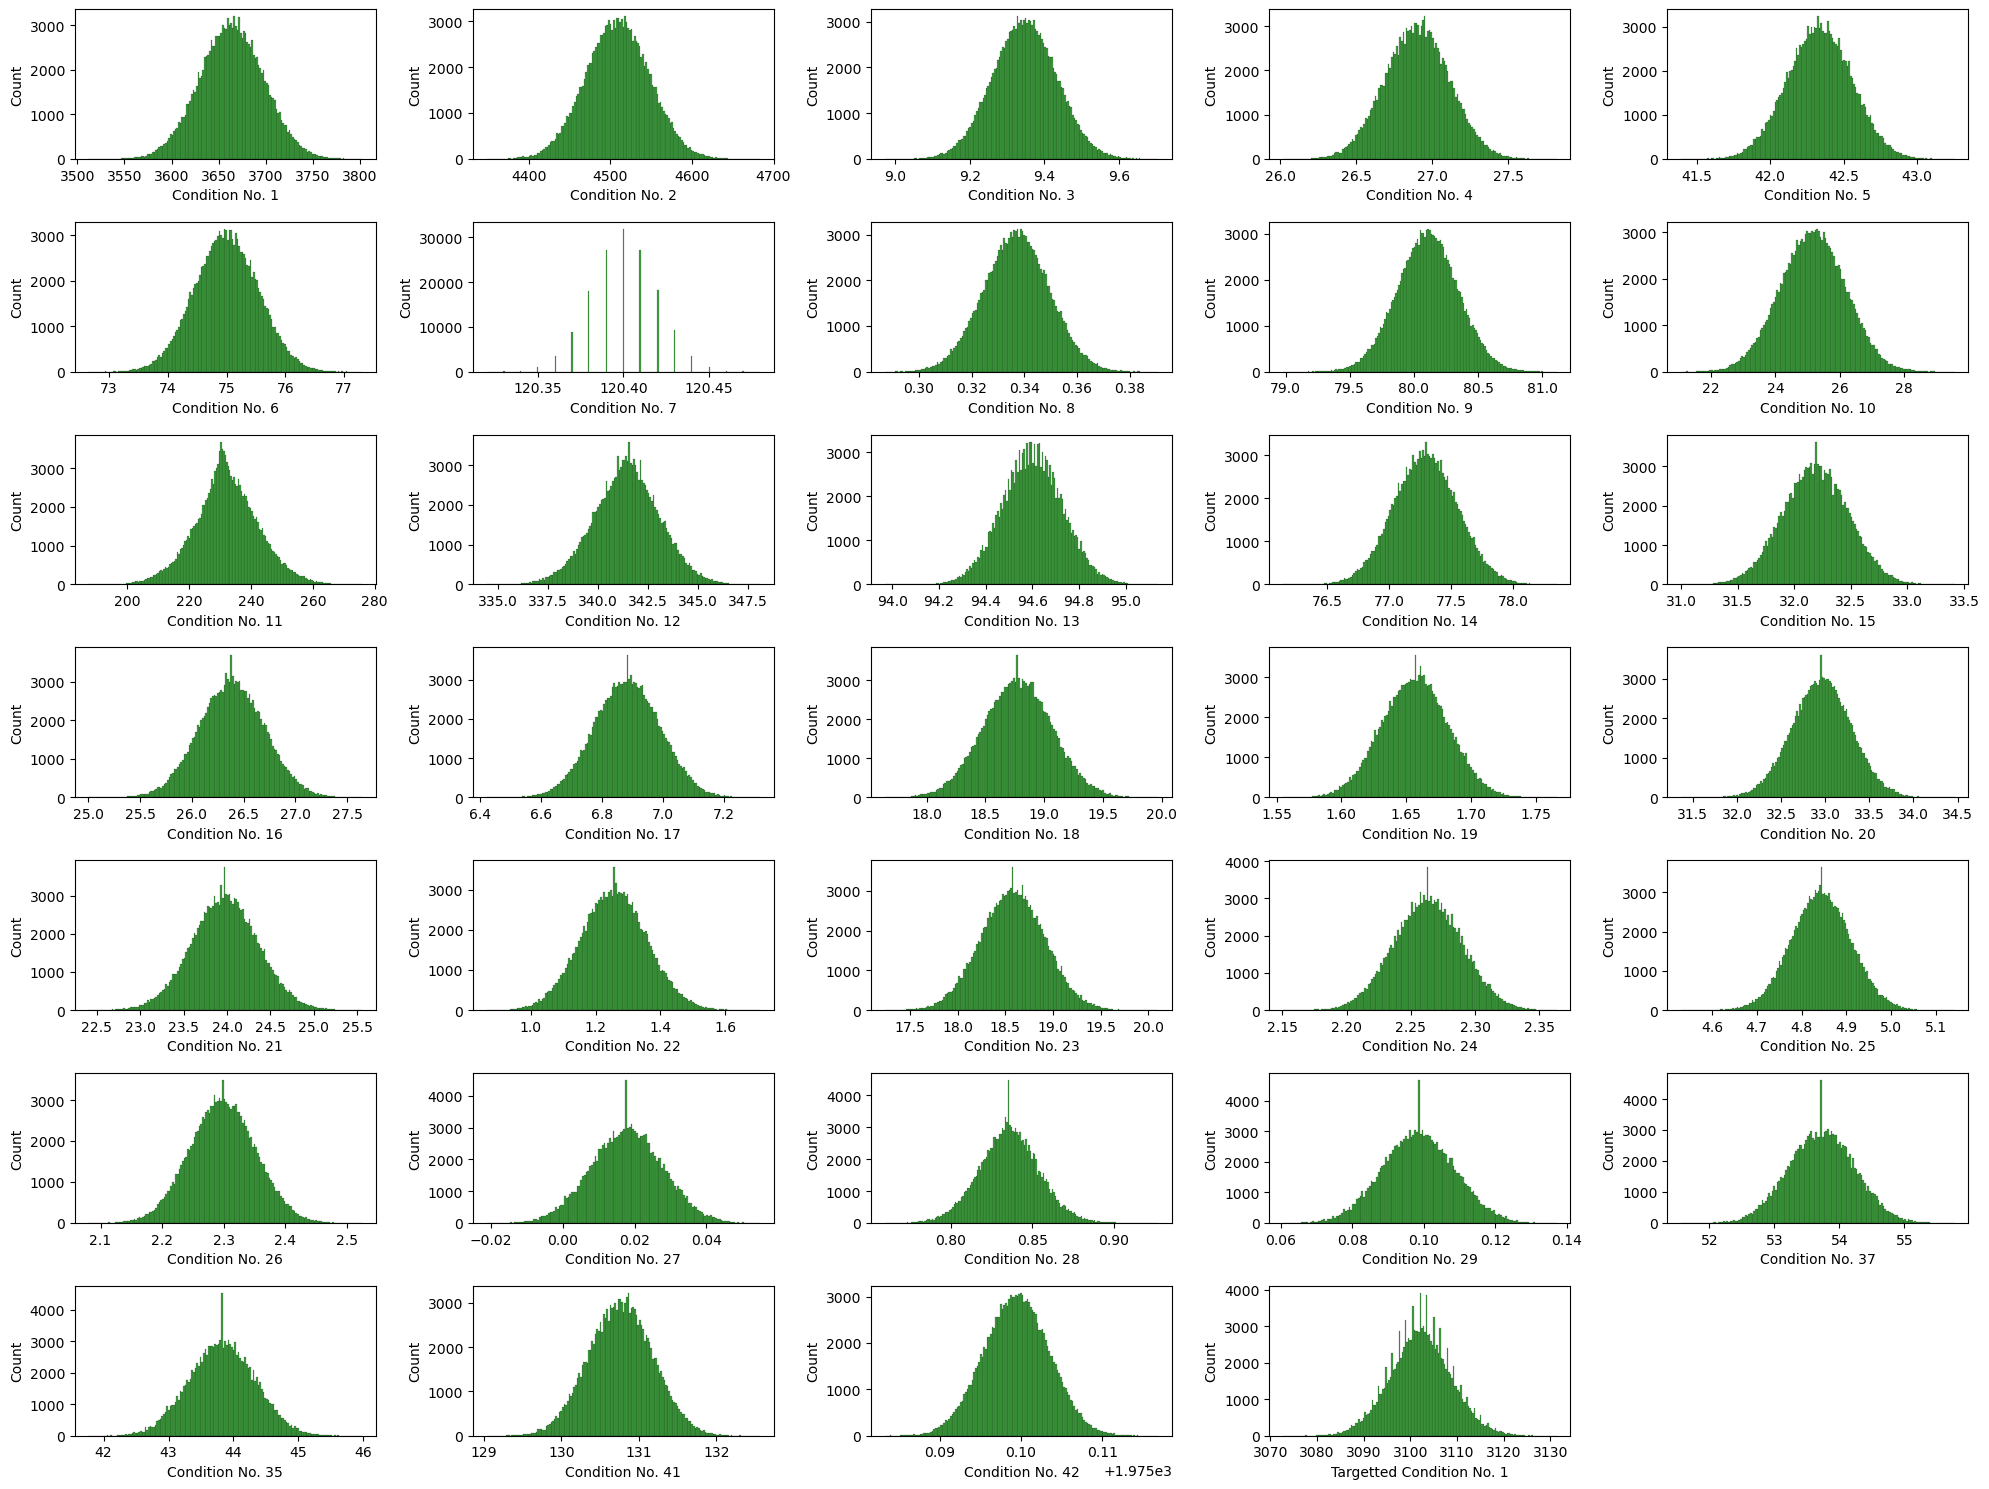

In [ ]:
plotHistogram(35, 7, 5, numericalCols)

In [ ]:
df.isnull().sum()

Condition No. 1              0
Condition No. 2              0
Condition No. 3              0
Condition No. 4              0
Condition No. 5              0
Condition No. 6              0
Condition No. 7              0
Condition No. 8              0
Condition No. 9              0
Condition No. 10             0
Condition No. 11             0
Condition No. 12             0
Condition No. 13             0
Condition No. 14             0
Condition No. 15             0
Condition No. 16             0
Condition No. 17             0
Condition No. 18             0
Condition No. 19             0
Condition No. 20             0
Condition No. 21             0
Condition No. 22             0
Condition No. 23             0
Condition No. 24             0
Condition No. 25             0
Condition No. 26             0
Condition No. 27             0
Condition No. 28             0
Condition No. 29             0
Condition No. 37             0
Condition No. 35             0
Condition No. 41             0
Conditio

In [ ]:
df.shape

(150269, 34)

# MODEL SELECTION

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
from sklearn.utils import all_estimators
def getEstimators(estimator):
    regressorModels = []
    for name, RegressorClass in all_estimators(type_filter = estimator):
        try:
            regressor = RegressorClass()
            regressorModels.append((name, regressor))
        except Exception as e:
            pass
    return regressorModels
regressorModels = []
regressorModels = getEstimators('regressor')
model1 = regressorModels[:10]
model2 = regressorModels[10:20]
model3 = regressorModels[20:30]
model4 = regressorModels[30:40]
model5 = regressorModels[40:51]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score

def evaluate(model, XTrain, yTrain, XTest, yTest):
    model.fit(XTrain, yTrain)
    yPred = model.predict(XTest)
    r2 = r2_score(yTest, yPred)
    print(f'Model Name = {type(model).__name__}, r2_score = {r2}')

In [ ]:
def tryModels(models):
    for model in models:
        try:
            print(f'Running {type(model[1]).__name__}')
            ans = evaluate(model[1], XTrain, yTrain, XTest, yTest)
            print(ans)
        except Exception as e:
            pass
    

In [ ]:
tryModels(model1)

In [ ]:
tryModels(model2)

In [ ]:
tryModels(model3)

In [ ]:
tryModels(model4)

In [ ]:
tryModels(model5)

# TRAINING[ExtraTreesRegressor]

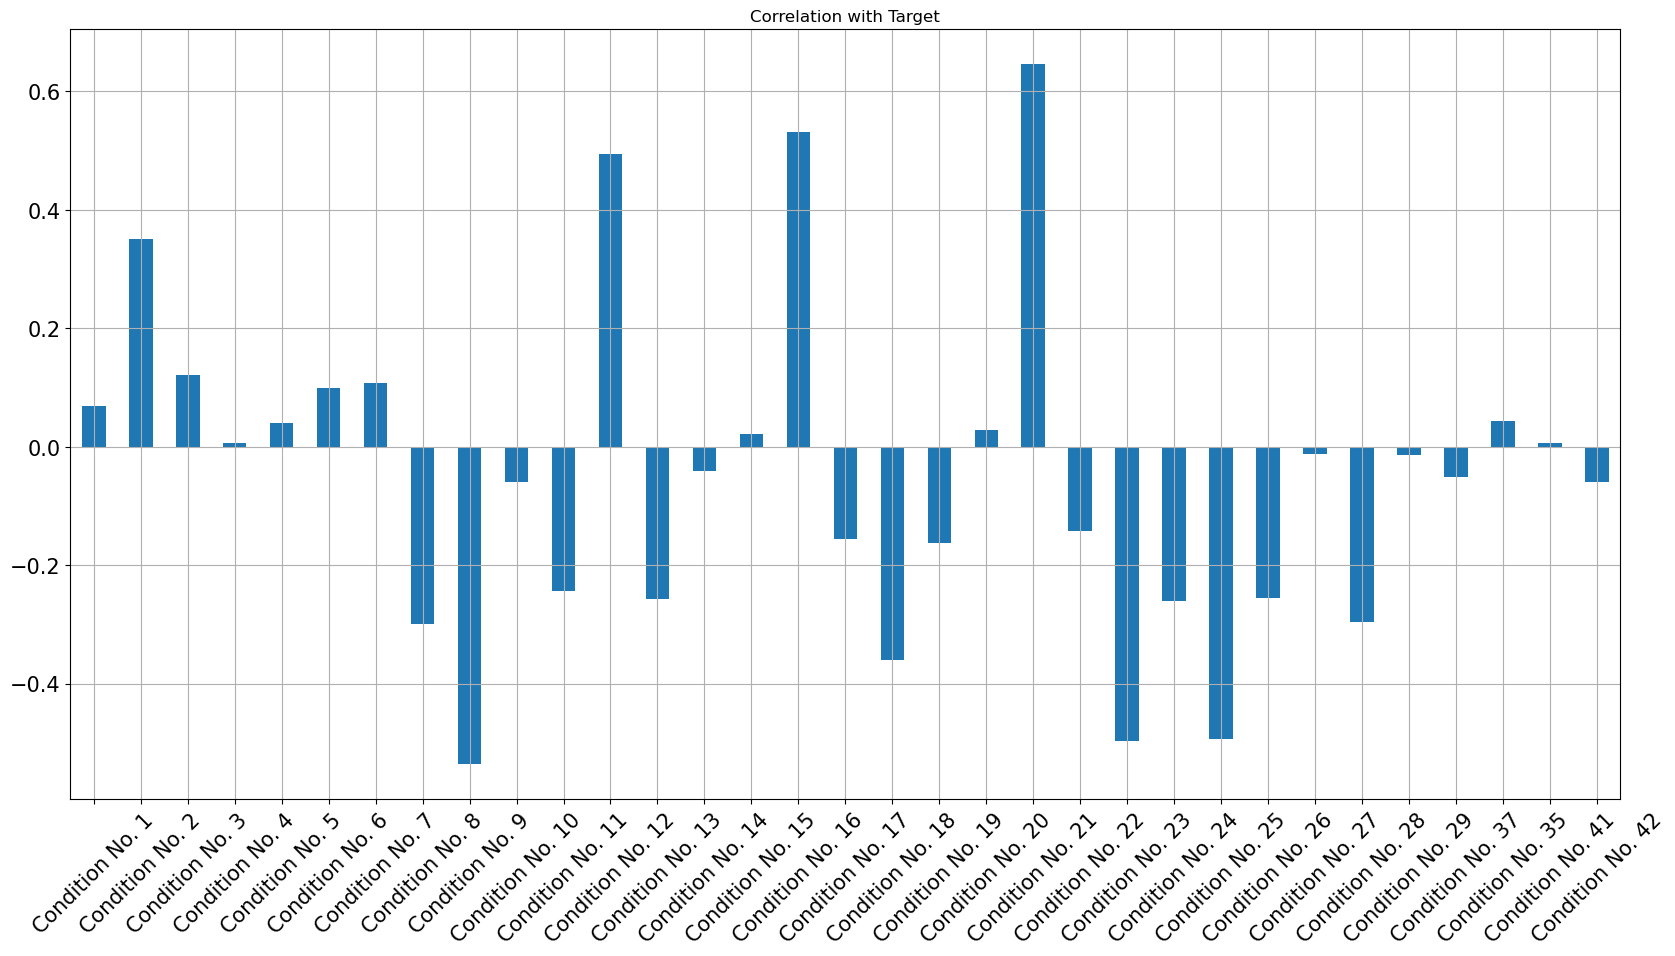

In [ ]:
from  sklearn.ensemble import ExtraTreesRegressor
X = df.drop('Targetted Condition No. 1', axis=1)
y = df['Targetted Condition No. 1']
X.corrwith(y).plot.bar(figsize=(20, 10), title="Correlation with Target", fontsize=15, rot=45, grid=True)
plt.show()

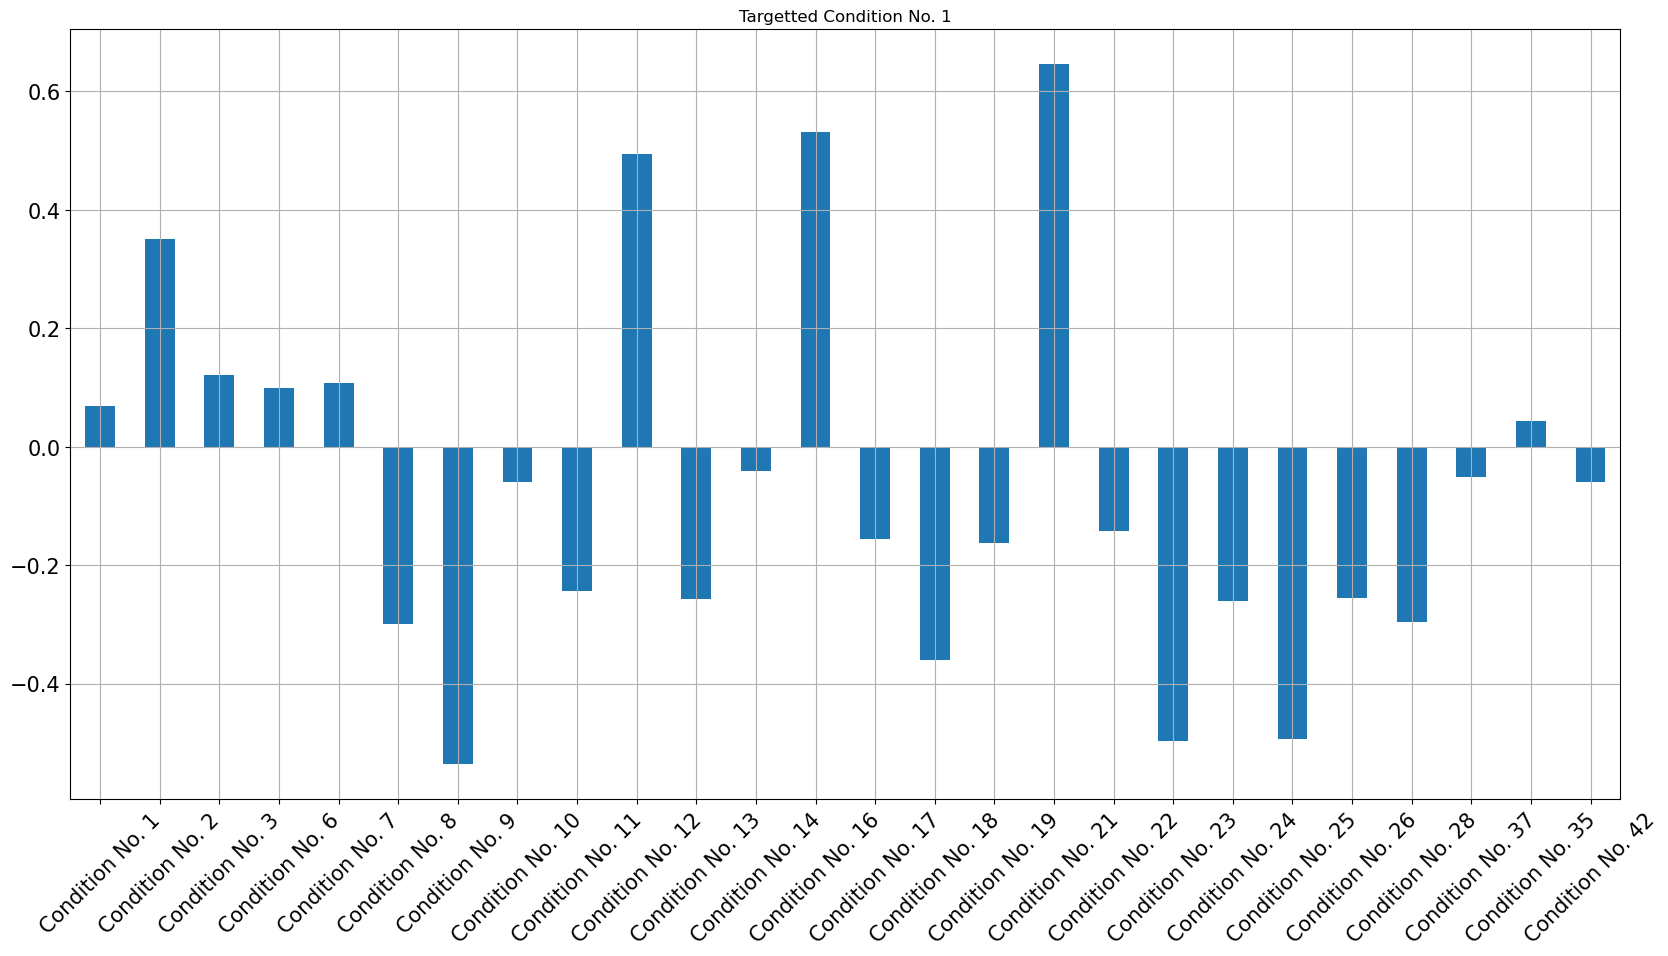

In [ ]:
X = X.drop(X.corrwith(y)[abs(X.corrwith(y)) < 0.04].index, axis=1)
X.corrwith(y).plot.bar(figsize=(20,10), title="Targetted Condition No. 1", fontsize=15, rot=45, grid=True)
plt.show()


In [ ]:
model = ExtraTreesRegressor(n_estimators=100, random_state=0)
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f'Model Name = {type(model).__name__}, r2_score = {r2}')

Model Name = ExtraTreesRegressor, r2_score = 1.0


In [ ]:
df2 = pd.read_csv("/kaggle/input/climate/hack-for-climate-hackathon-bhuabaneswar-ict89534/Evaluation Dataset.csv")
df2 = df2[X.columns]
df2.head()

,Condition No. 1,Condition No. 2,Condition No. 3,Condition No. 6,Condition No. 7,Condition No. 8,Condition No. 9,Condition No. 10,Condition No. 11,Condition No. 12,...,Condition No. 21,Condition No. 22,Condition No. 23,Condition No. 24,Condition No. 25,Condition No. 26,Condition No. 28,Condition No. 37,Condition No. 35,Condition No. 42
0,3633.0,4491.6,9.3233,74.366,120.42,0.34398,80.054,26.191,230.97,339.60,...,24.391,1.1917,19.030,2.2794,4.8459,2.3389,0.85592,53.696,43.342,1975.103522
1,3654.7,4526.4,9.2720,75.423,120.40,0.34092,79.798,25.120,223.37,339.58,...,23.970,1.2196,18.454,2.2798,4.8528,2.2791,0.83471,54.647,43.590,1975.099289
2,3655.9,4468.3,9.3669,75.461,120.40,0.36692,80.222,23.749,247.97,342.87,...,23.533,1.3431,18.601,2.2694,4.7115,2.2466,0.81435,53.348,44.683,1975.093870
3,3689.9,4532.0,9.4211,73.959,120.41,0.34800,80.085,25.954,235.19,340.78,...,23.825,1.4976,18.703,2.2522,4.8880,2.3085,0.83669,53.861,43.891,1975.102585
4,3687.9,4494.1,9.5047,75.249,120.40,0.34721,80.130,25.739,235.64,343.43,...,23.318,1.1824,18.591,2.2967,4.9020,2.2538,0.80269,53.474,43.455,1975.101735


In [ ]:
df2['Predicted'] = 0

In [ ]:
model = ExtraTreesRegressor(n_estimators=100, random_state=0)
model.fit(X, y)
df2['Predicted'] = model.predict(df2[X.columns])
df2.head()

,Condition No. 1,Condition No. 2,Condition No. 3,Condition No. 6,Condition No. 7,Condition No. 8,Condition No. 9,Condition No. 10,Condition No. 11,Condition No. 12,...,Condition No. 22,Condition No. 23,Condition No. 24,Condition No. 25,Condition No. 26,Condition No. 28,Condition No. 37,Condition No. 35,Condition No. 42,Predicted
0,3633.0,4491.6,9.3233,74.366,120.42,0.34398,80.054,26.191,230.97,339.60,...,1.1917,19.030,2.2794,4.8459,2.3389,0.85592,53.696,43.342,1975.103522,3100.300
1,3654.7,4526.4,9.2720,75.423,120.40,0.34092,79.798,25.120,223.37,339.58,...,1.2196,18.454,2.2798,4.8528,2.2791,0.83471,54.647,43.590,1975.099289,3098.893
2,3655.9,4468.3,9.3669,75.461,120.40,0.36692,80.222,23.749,247.97,342.87,...,1.3431,18.601,2.2694,4.7115,2.2466,0.81435,53.348,44.683,1975.093870,3102.100
3,3689.9,4532.0,9.4211,73.959,120.41,0.34800,80.085,25.954,235.19,340.78,...,1.4976,18.703,2.2522,4.8880,2.3085,0.83669,53.861,43.891,1975.102585,3101.262
4,3687.9,4494.1,9.5047,75.249,120.40,0.34721,80.130,25.739,235.64,343.43,...,1.1824,18.591,2.2967,4.9020,2.2538,0.80269,53.474,43.455,1975.101735,3096.900


In [ ]:
df2['Id'] = df2.index
df2 = df2[['Id', 'Predicted']]
df2.head()

,Id,Predicted
0,0,3100.300
1,1,3098.893
2,2,3102.100
3,3,3101.262
4,4,3096.900


In [ ]:
df2.to_csv('../data/submission.csv', index=False)